In [184]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Understanding

We would like to track Corona VIRUS spread across countries and with personal local info


# GITHUB CSV DATA

git clone/pull:https://github.com/CSSEGISandData/COVID-19

In [185]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

pd_raw=pd.read_csv(data_path)

In [186]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179328,179477,179597,179624,179674,179716,179716,179771,179835,179835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275688,275732,275732,275732,275838,275864,275881,275939,275985,276012
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265828,265834,265841,265847,265851,265854,265855,265860,265862,265864
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42572,42572,42572,42572,42572,42572,42572,42894,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99433,99527,99527


In [187]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/17/22', '5/18/22', '5/19/22', '5/20/22', '5/21/22', '5/22/22',
       '5/23/22', '5/24/22', '5/25/22', '5/26/22'],
      dtype='object', length=856)

In [188]:
time_idx=pd_raw.columns[4:]

In [189]:
df_plot=pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [190]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [191]:
pd_raw[pd_raw['Country/Region']=='US'].iloc[:,4::].sum(axis=0)

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
5/22/22    83282408
5/23/22    83390587
5/24/22    83501457
5/25/22    83718160
5/26/22    83837114
Length: 856, dtype: int64

In [192]:
country_list=['Norway',
             'US',
             'Spain',
             'Germany',
             'Afghanistan',
             ]

In [193]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
    

<AxesSubplot:xlabel='date'>

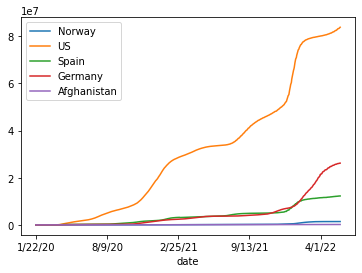

In [194]:
%matplotlib inline
df_plot.set_index('date').plot()

# DATA TYPE DATE

In [195]:
from datetime import datetime   #using the datetime  library

In [196]:
# type(df_plot.date[0])

In [197]:
df_plot.head()

,date,Norway,US,Spain,Germany,Afghanistan
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0


In [198]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")            #function "strptime" converts a string to date object(as the type is str type)

datetime.datetime(2020, 1, 22, 0, 0)

In [199]:
time_index=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date ] #converting to a datetime.. a vector "time_index" of datetime objects

In [200]:
time_index[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [201]:
time_string=[each.strftime('%Y-%m-%d') for each in time_index] #converting back to str(function is "each.strftime")

In [202]:
time_string[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

This string vector norm can be used for title, text etc. This can be used by other tools like excel powervi etc

In [203]:
df_plot['date']=time_index  #pusing the vector to a 'date' column
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [204]:
df_plot.head()

,date,Norway,US,Spain,Germany,Afghanistan
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [205]:
df_plot.to_csv('../data/processed/covid_small_table.csv',sep=';',index=False)

# Relational data model-defining a primary key

A primary key's main feature are:
1.It  ust contain a unique valuefor each row of data
2.It cant contain null values

In [206]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179328,179477,179597,179624,179674,179716,179716,179771,179835,179835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275688,275732,275732,275732,275838,275864,275881,275939,275985,276012
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265828,265834,265841,265847,265851,265854,265855,265860,265862,265864
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42572,42572,42572,42572,42572,42572,42572,42894,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99433,99527,99527


In [207]:
#Doing some name changes
pd_data_base = pd_raw.rename(columns = {'Country/Region': 'country', 'Province/State' : 'state'})

In [208]:
pd_data_base['state']=pd_data_base['state'].fillna('no')

In [209]:
#we have to remove 'Lat' and 'Long' colums from the data set since it wont change wrt time
pd_data_base = pd_data_base.drop(['Lat','Long'], axis=1)
#pd_data_base.head()

In [210]:
test_pd = pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date', 0:'confirmed'},)

In [221]:
test_pd

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,Anguilla,United Kingdom,0
2,2020-01-22,Anhui,China,1
3,2020-01-22,Aruba,Netherlands,0
4,2020-01-22,Australian Capital Territory,Australia,0
...,...,...,...,...
243955,2022-05-26,no,West Bank and Gaza,657573
243956,2022-05-26,no,Winter Olympics 2022,535
243957,2022-05-26,no,Yemen,11819
243958,2022-05-26,no,Zambia,321399


In [212]:
#Creating an index of state and countries and dates and transposing it with '.T'
#test_pd = pd_data_base.set_index(['state','country']).T

In [213]:
#test_pd.columns #multi index- 2 dimensional index columns giving state and country

In [214]:
#command to stack the multi columns to row perspective(coulmns to rows like in pivotin a tble in excel
#test_pd.stack(level=[0,1]).reset_index()

In [222]:
pd_data_base.dtypes

state      object
country    object
1/22/20     int64
1/23/20     int64
1/24/20     int64
            ...  
5/22/22     int64
5/23/22     int64
5/24/22     int64
5/25/22     int64
5/26/22     int64
Length: 858, dtype: object

In [216]:
test_pd['date']=test_pd.date.astype('datetime64[ns]')

The type of date is still a 'str object'.. It should be converted to datetime object

In [223]:
test_pd.confirmed=test_pd.confirmed.astype(int)
test_pd.to_csv('../data/processed/covid_relationalcases-confirmed.csv',sep=';',index=False)

In [224]:
print(test_pd[test_pd['country']=='US'].tail())

             date state country  confirmed
242805 2022-05-22    no      US   83282408
243090 2022-05-23    no      US   83390587
243375 2022-05-24    no      US   83501457
243660 2022-05-25    no      US   83718160
243945 2022-05-26    no      US   83837114


## Group by 

In [225]:
rel_data = pd.read_csv('../data/processed/covid_relationalcases-confirmed.csv',sep=';',parse_dates=[0])
rel_data = rel_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
rel_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,Kosovo,0
2,2020-01-22,no,Kuwait,0
3,2020-01-22,no,Kyrgyzstan,0
4,2020-01-22,no,Laos,0


In [226]:
test_data = rel_data[((rel_data['country']=='India') | 
                     (rel_data['country']=='Spain') | 
                     (rel_data['country']=='Canada')) & 
                     (rel_data['date']>'2020-05-05')]

test_data

,date,state,country,confirmed
29988,2020-05-06,no,India,52987
30012,2020-05-06,no,Spain,220325
30069,2020-05-06,New Brunswick,Canada,120
30073,2020-05-06,Manitoba,Canada,286
30091,2020-05-06,Repatriated Travellers,Canada,0
...,...,...,...,...
243866,2022-05-26,Alberta,Canada,580881
243878,2022-05-26,Diamond Princess,Canada,0
243886,2022-05-26,Grand Princess,Canada,13
243888,2022-05-26,Saskatchewan,Canada,137967


In [227]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Canada,2022-05-26,Yukon,1313628
India,2022-05-26,no,43147530
Spain,2022-05-26,no,12280345


In [228]:
test_data.groupby(['state','country']).agg(np.max)

,,date,confirmed
state,country,,
Alberta,Canada,2022-05-26,580881
British Columbia,Canada,2022-05-26,370559
Diamond Princess,Canada,2022-05-26,1
Grand Princess,Canada,2022-05-26,13
Manitoba,Canada,2022-05-26,144140
New Brunswick,Canada,2022-05-26,65258
Newfoundland and Labrador,Canada,2022-05-26,45775
Northwest Territories,Canada,2022-05-26,12046
Nova Scotia,Canada,2022-05-26,94893


In [229]:
# %load ../src/features/build_features.py

import numpy as np
from sklearn import linear_model
import pandas as pd
from scipy import signal

reg = linear_model.LinearRegression(fit_intercept=True)

def get_rate_via_regression(in_array):
    
    #y = np.array(in_array['confirmed'])
    #x = np.arange(len(y)).reshape(-1,1)
    
    y = np.array(in_array)
    x = np.arange(-1,2).reshape(-1,1)
   
    #assert len(in_array) == 3
    
    reg.fit(x,y)
    intercept = reg.intercept_
    slope = reg.coef_
    
    return intercept/slope

In [230]:
#test_data.groupby(['state','country']).apply(get_rate_via_regression)

In [231]:
def rolling_reg(df_input,col='confirmed'):
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_rate_via_regression,raw=False)
    return result
    

In [232]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state    country        
Alberta  Canada   30117             NaN
                  30424             NaN
                  30688       89.274074
                  30972       87.009524
                  31279       79.604301
                               ...     
no       Spain    242622     439.656014
                  242905            inf
                  243211    7490.599939
                  243477    7491.266605
                  243758     579.682233
Name: confirmed, Length: 13518, dtype: float64

In [233]:
pd_DR_result=test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [234]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'confirmed_DR',
                             'level_2':'index'})
pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,30117,NaN
1,Alberta,Canada,30424,NaN
2,Alberta,Canada,30688,89.274074
3,Alberta,Canada,30972,87.009524
4,Alberta,Canada,31279,79.604301


In [235]:
rel_data=rel_data.reset_index()
rel_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0
1,1,2020-01-22,no,Kosovo,0
2,2,2020-01-22,no,Kuwait,0
3,3,2020-01-22,no,Kyrgyzstan,0
4,4,2020-01-22,no,Laos,0


In [236]:
pd_result_large=pd.merge(rel_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR
0,0,2020-01-22,Alberta,Canada,0,NaN
1,1,2020-01-22,no,Kosovo,0,NaN
2,2,2020-01-22,no,Kuwait,0,NaN
3,3,2020-01-22,no,Kyrgyzstan,0,NaN
4,4,2020-01-22,no,Laos,0,NaN


## Filtering data with group by 

In [237]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0)
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, #window size
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

In [238]:
pd_filtered_result=rel_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [239]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0
1,1,2020-01-22,no,Kosovo,0,NaN,0.0
2,2,2020-01-22,no,Kuwait,0,NaN,0.0
3,3,2020-01-22,no,Kyrgyzstan,0,NaN,0.0
4,4,2020-01-22,no,Laos,0,NaN,0.0


## Filtered doubling rate data

In [241]:
pd_filtered_doubling=pd_result_large[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'doubling_rate_filtered',
                             'level_2':'index'})

pd_filtered_doubling.head()

,state,country,index,doubling_rate_filtered
0,Alberta,Canada,0,NaN
1,Alberta,Canada,499,NaN
2,Alberta,Canada,762,NaN
3,Alberta,Canada,1069,NaN
4,Alberta,Canada,1333,NaN


In [242]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_doubling[['index','doubling_rate_filtered']],on=['index'],how='left')
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0,NaN
1,1,2020-01-22,no,Kosovo,0,NaN,0.0,NaN
2,2,2020-01-22,no,Kuwait,0,NaN,0.0,NaN
3,3,2020-01-22,no,Kyrgyzstan,0,NaN,0.0,NaN
4,4,2020-01-22,no,Laos,0,NaN,0.0,NaN


In [243]:
mask=pd_result_large['confirmed']>100

In [244]:
pd_result_large['doubling_rate_filtered']=pd_result_large['doubling_rate_filtered'].where(mask, other=np.NaN) 

In [245]:
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0,NaN
1,1,2020-01-22,no,Kosovo,0,NaN,0.0,NaN
2,2,2020-01-22,no,Kuwait,0,NaN,0.0,NaN
3,3,2020-01-22,no,Kyrgyzstan,0,NaN,0.0,NaN
4,4,2020-01-22,no,Laos,0,NaN,0.0,NaN


In [246]:
pd_result_large.to_csv('../data/processed/COVID_final_set.csv',sep=';')